# Claim 2 : Final Graph - Bayesian analysis

In [1]:
import pandas as pd
import numpy as np

# make plot
from plotnine import ggplot, aes, geom_violin, coord_flip, geom_hline, \
                     position_dodge, xlab, ylab, geom_text, facet_wrap, \
                     geom_point, xlim, theme, element_text

# 1.1 Decision trees (DT)

In [2]:
hs = pd.read_csv("modelling/data/reg-hsdt-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "hs"})
ccp = pd.read_csv("modelling/data/reg-ccp-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "ccp"})
hsccp = pd.read_csv("modelling/data/reg-hsccp-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "hs-ccp"})
rand = hs.copy()
rand["ccp"] = np.array(ccp["ccp"])
rand["hs-ccp"] = np.array(hsccp["hs-ccp"])

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

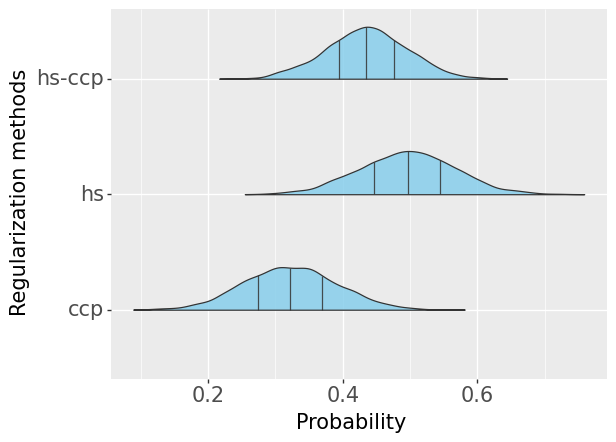

<ggplot: (8727490055802)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/reg-dt.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use 

In [3]:
# classification_random = pd.read_csv("modelling/data/ccp-classification.csv")
# regression_random = pd.read_csv("modelling/data/ccp-regression.csv")
# regression_random["dataset"] += 8
# random = pd.concat([classification_random, regression_random])
# random.to_csv("modelling/data/random.csv")

disp = pd.melt(rand, value_vars=["hs", "ccp", "hs-ccp"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{better}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("Regularization methods")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/reg-dt.png", height = 5, width = 5, units = "in", dpi = 1000)

# 1.2 Random Forest (RF)

In [19]:
hsrf = pd.read_csv("modelling/data/reg-hsrf-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "hs"})
dmax = pd.read_csv("modelling/data/reg-dmax-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "dmax"})
mtry = pd.read_csv("modelling/data/reg-mtry-res.csv")[["theta_upper[2]"]].rename(columns = {"theta_upper[2]": "mtry"})
rand = hsrf.copy()
rand["dmax"] = np.array(dmax["dmax"])
rand["mtry"] = np.array(mtry["mtry"])

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* ind

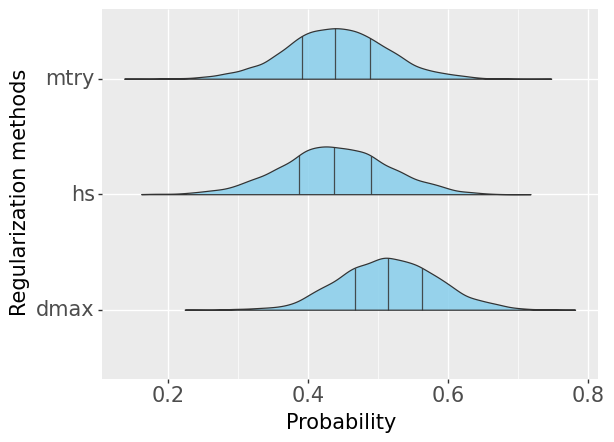

<ggplot: (8793050676206)>

/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: graphs/reg-rf.png
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use 

In [25]:
# classification_random = pd.read_csv("modelling/data/ccp-classification.csv")
# regression_random = pd.read_csv("modelling/data/ccp-regression.csv")
# regression_random["dataset"] += 8
# random = pd.concat([classification_random, regression_random])
# random.to_csv("modelling/data/random.csv")

disp = pd.melt(rand, value_vars=["hs", "dmax", "mtry"], value_name='sample')
disp.loc[disp.variable == "theta_upper[1]", "variable"] = "$p_{better}$"
disp.loc[disp.variable == "theta_upper[2]", "variable"] = "$p_{same}$"

g = (
    ggplot(disp, aes(x="variable", y="sample"))
    + geom_violin(disp, draw_quantiles = [0.25, 0.5, 0.75], fill = "skyblue", alpha = 0.85, style = "right", position = position_dodge())
    # + geom_hline(yintercept = 0, linetype = "dashed", color = "red")
    + theme(text=element_text(size=15))
    + xlab("Regularization methods")
    + ylab("Probability")
    # + geom_text(disp_mu, aes(x="parameters", y="value", label = "value_str"), nudge_x = -0.2, size = 10)
    + coord_flip()
    # + facet_wrap("var")
)
display(g)
g.save(filename = "graphs/reg-rf.png", height = 5, width = 5, units = "in", dpi = 1000)